<a href="https://colab.research.google.com/github/sensiboi/Sales_Funnel_Analysis/blob/main/Sales_Funnel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DROP OFF ANALYSIS USING SALES FUNNEL**

**OBJECTIVE: To identify the customer drop offs and build a predictive model using Logistic Regression**

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

Load Datasets

In [ ]:
mql = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
deals = pd.read_csv("olist_closed_deals_dataset.csv")


Merge both datasets on mql_id

In [ ]:
df = pd.merge(mql, deals, on='mql_id', how='left')

Create binary conversion column

In [ ]:
df["converted"] = df["seller_id"].notna().astype(int)

In [ ]:
df["first_contact_date"] = pd.to_datetime(df["first_contact_date"])

Daily Coversion Rate

In [ ]:
daily_conv = df.groupby("first_contact_date")["converted"].mean().reset_index()
daily_conv.columns = ["date", "daily_conversion_rate"]

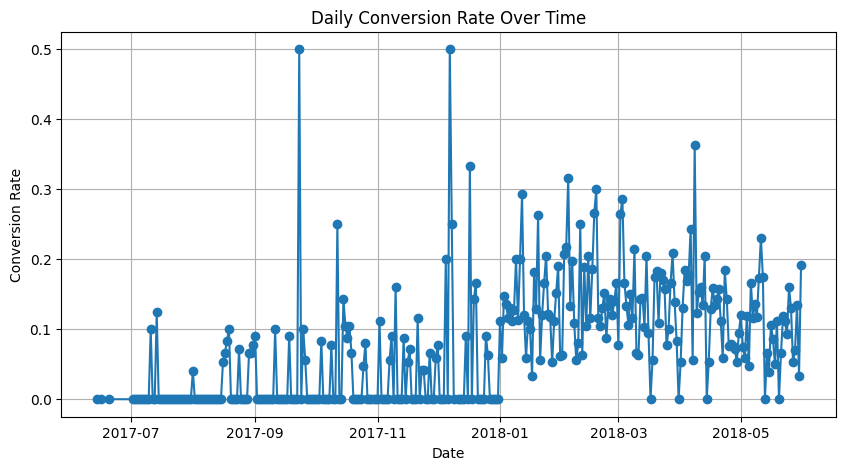

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(daily_conv["date"], daily_conv["daily_conversion_rate"], marker="o")
plt.title("Daily Conversion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.show()


Cleaning numeric columns for model and prepare features and target

In [ ]:
df["declared_product_catalog_size"] = pd.to_numeric(df["declared_product_catalog_size"], errors="coerce").fillna(0)
df["declared_monthly_revenue"] = pd.to_numeric(df["declared_monthly_revenue"], errors="coerce").fillna(0)
X = df[["declared_product_catalog_size", "declared_monthly_revenue"]]
y = df["converted"]


Splitting into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Prediction and Probabilities

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

ROC Curve and AUC

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

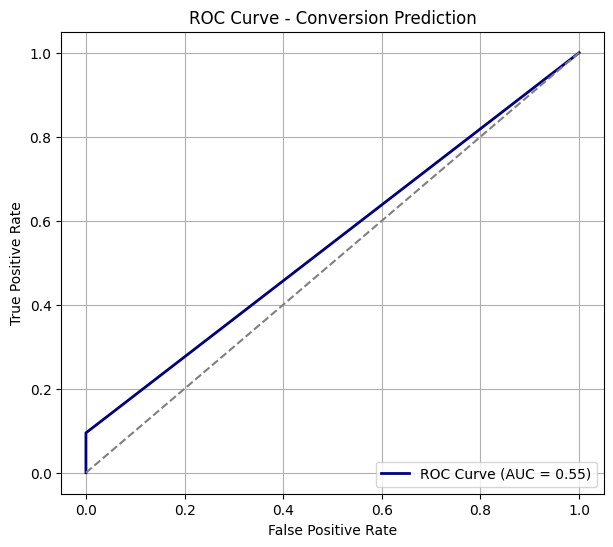

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Conversion Prediction")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Confusion Matrix table

In [ ]:
cm_df = pd.DataFrame(cm, index=["Actual No", "Actual Yes"], columns=["Predicted No", "Predicted Yes"])
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
            Predicted No  Predicted Yes
Actual No           2147              0
Actual Yes           229             24


Visualization of Confusion Matrix

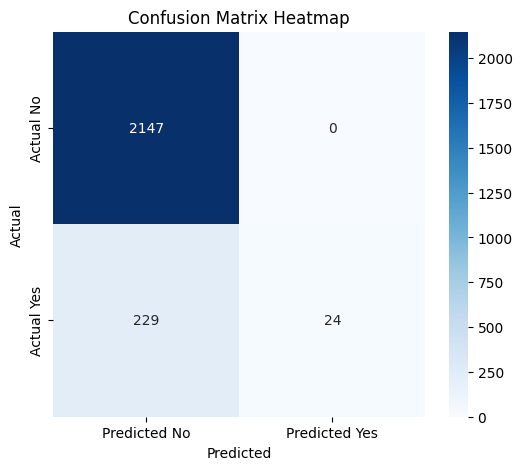

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Classification Report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAUC Score: {roc_auc:.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2147
           1       1.00      0.09      0.17       253

    accuracy                           0.90      2400
   macro avg       0.95      0.55      0.56      2400
weighted avg       0.91      0.90      0.87      2400


AUC Score: 0.547
